# Checkpoint 1

In [1]:
import pandas as pd

# Companies data 
companies = pd.read_csv('companies.txt', sep="\t", encoding='latin1') 
companies.rename(columns={'permalink':'company_permalink'}, inplace=True)

#Data cleaning
companies['company_permalink']= companies['company_permalink'].str.lower()

#Rounds2 data
rounds2 = pd.read_csv('rounds2.csv', encoding= 'latin')

#Data cleaning
rounds2['company_permalink']= rounds2['company_permalink'].str.lower()


In [2]:
#Table 1.1

#Solution to Q-1
print('-------------Unique Companies in rounds2 data frame---------------')
print(rounds2['company_permalink'].nunique())  #66370
print('------------------------------------------------------------------')

#Solution to Q-2
print('-------------Unique Companies in companies data frame---------------')
print(companies['company_permalink'].nunique()) #66368
print('--------------------------------------------------------------------')

#Solution to Q-3
#permalink

#Solution to Q-4
print('-------------Number of records present in rounds2 but not in companies dataframe---------------')
print(rounds2['company_permalink'].nunique() - companies['company_permalink'].nunique())  # yes - 2
print('-----------------------------------------------------------------------------------------------')

#Solution to Q-5
#for merging of dataframes in permalink column of rounds2
master_frame = pd.merge(rounds2, companies, how='left', on= 'company_permalink')  #114949

print('-------------Number of observations present in master_frame---------------')
print(master_frame.shape[0])
print('--------------------------------------------------------------------------')


-------------Unique Companies in rounds2 data frame---------------
66370
------------------------------------------------------------------
-------------Unique Companies in companies data frame---------------
66368
--------------------------------------------------------------------
-------------Number of records present in rounds2 but not in companies dataframe---------------
2
-----------------------------------------------------------------------------------------------
-------------Number of observations present in master_frame---------------
114949
--------------------------------------------------------------------------


# Checkpoint 2

In [3]:
#Table 2.1

#to avoid scientific notations
pd.set_option('display.float_format', '{:.2f}'.format)  

#Average invested amount for each Investment type
print('-------------Average amount invested for each Investment type---------------')
print(master_frame.groupby('funding_round_type').mean())
print('-----------------------------------------------------------------------------')

#Data Frame  required for Plot 1 
master_frame_for_plot1 = master_frame

#filter data based on the Venture investment type which is best suited to Spark Funds
master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']


-------------Average amount invested for each Investment type---------------
                       raised_amount_usd
funding_round_type                      
angel                          958694.47
convertible_note              1453438.54
debt_financing               17043526.02
equity_crowdfunding            538368.21
grant                         4300576.34
non_equity_assistance          411203.05
post_ipo_debt               168704571.82
post_ipo_equity              82182493.87
private_equity               73308593.03
product_crowdfunding          1363131.07
secondary_market             79649630.10
seed                           719818.00
undisclosed                  19242370.23
venture                      11748949.13
-----------------------------------------------------------------------------


# Checkpoint 3

In [4]:
#Table 3.1

#find the top9 countries for investment in venture investment type
top9 = master_frame.groupby('country_code').sum().sort_values(by = ['raised_amount_usd'], ascending= False).head(9)
top9.reset_index(inplace=True)
print('----------Top 9 countries that received highest total investment in venture type----------')
print(master_frame.groupby('country_code').sum().sort_values(by = ['raised_amount_usd'], ascending= False).head(9))
print('------------------------------------------------------------------------------------------')

----------Top 9 countries that received highest total investment in venture type----------
              raised_amount_usd
country_code                   
USA             422510842796.00
CHN              39835418773.00
GBR              20245627416.00
IND              14391858718.00
CAN               9583332317.00
FRA               7259536732.00
ISR               6907514579.00
DEU               6346959822.00
JPN               3363676611.00
------------------------------------------------------------------------------------------


# Checkpoint 4

In [5]:
#extracting only the first sector from pipeline
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x : str(x).split('|')[0])
#master_frame['category_list']

#mapping the primary sectors to its main sectors in mapping dataframe
mapping = pd.read_csv('mapping.csv')
mapping.set_index('category_list', inplace=True)
mapping['main_sector'] = mapping.idxmax(axis=1)
mapping = mapping[['main_sector']]
mapping.reset_index(inplace=True)

#Replacing 'na' at '0' for data cleaning and transforming
mapping['category_list'] = mapping['category_list'].apply(lambda x : str(x).split('0'))
mapping['category_list'] = mapping['category_list'].str.join("na")

#Mapping main sector to primary sector in master_frame by merging
master_frame = pd.merge(master_frame, mapping, how='inner', left_on="primary_sector", right_on='category_list')



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Checkpoint 5

In [6]:
#Filtering master_frame for investment amount between 5 to 5 million USD
master_frame = master_frame[(master_frame['raised_amount_usd'] <= 15000000 ) & (master_frame['raised_amount_usd'] >= 5000000 )]

#DataFrame for USA
D1 = master_frame[(master_frame['country_code'] == 'USA')]

#DataFrame for GBR
D2 =  master_frame[(master_frame['country_code'] == 'GBR')]

#DataFrame for IND
D3 =  master_frame[(master_frame['country_code'] == 'IND')]


#Table 5.1 

#Solution to Q-1
print('-------Total Number of Investment count for USA, GBR, IND respectively--------')
print(D1.shape[0])
print(D2.shape[0])
print(D3.shape[0])
print('-------------------------------------------------------------------------------')

#Solution to Q-2
print('-------Total Amount of Investment for USA, GBR, IND respectively---------')
print(D1['raised_amount_usd'].sum())
print(D2['raised_amount_usd'].sum())
print(D3['raised_amount_usd'].sum())
print('--------------------------------------------------------------------------')

#Solution to Q-3, Q-4, Q-5, Q-6, Q-7, Q-8
print('-------Top 3 sectors and Number of Investments in each for USA----------')
print(D1.groupby('main_sector').size().reset_index(name = 'no. of investments').sort_values(by= 'no. of investments', ascending=False).head(3))
print('------------------------------------------------------------------------')

print('-------Top 3 sectors and Number of Investments in each for GBR----------')
print(D2.groupby('main_sector').size().reset_index(name = 'no. of investments').sort_values(by= 'no. of investments', ascending=False).head(3))
print('------------------------------------------------------------------------')

print('-------Top 3 sectors and Number of Investments in each for IND----------')
print(D3.groupby('main_sector').size().reset_index(name = 'no. of investments').sort_values(by= 'no. of investments', ascending=False).head(3))
print('------------------------------------------------------------------------')

#Solution to Q-9
print('-------Company that recieved Highest number of investments in USA--------')
print(D1[D1['main_sector'] == 'Others'].groupby('name').sum().sort_values(by = 'raised_amount_usd', ascending=False).head(1).index.item())
print('-------------------------------------------------------------------------')

print('-------Company that recieved Highest number of investments in GBR--------')
print(D2[D2['main_sector'] == 'Others'].groupby('name').sum().sort_values(by = 'raised_amount_usd', ascending=False).head(1).index.item())
print('-------------------------------------------------------------------------')

print('-------Company that recieved Highest number of investments in IND--------')
print(D3[D3['main_sector'] == 'Others'].groupby('name').sum().sort_values(by = 'raised_amount_usd', ascending=False).head(1).index.item())
print('-------------------------------------------------------------------------')

#Solution to Q-10
print('-------Company that recieved 2nd Highest number of investments in USA--------')
print(D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values(by = 'raised_amount_usd', ascending=False).head(1).index.item())
print('-----------------------------------------------------------------------------')

print('-------Company that recieved 2nd Highest number of investments in GBR--------')
print(D2[D2['main_sector'] == 'Cleantech / Semiconductors'].groupby('name').sum().sort_values(by = 'raised_amount_usd', ascending=False).head(1).index.item())
print('-----------------------------------------------------------------------------')

print('-------Company that recieved 2nd Highest number of investments in IND--------')
print(D3[D3['main_sector'] == 'News, Search and Messaging'].groupby('name').sum().sort_values(by = 'raised_amount_usd', ascending=False).head(1).index.item())
print('-----------------------------------------------------------------------------')


-------Total Number of Investment count for USA, GBR, IND respectively--------
12098
626
330
-------------------------------------------------------------------------------
-------Total Amount of Investment for USA, GBR, IND respectively---------
108083057956.0
5422993148.0
2976543602.0
--------------------------------------------------------------------------
-------Top 3 sectors and Number of Investments in each for USA----------
                               main_sector  no. of investments
7                                   Others                2950
8  Social, Finance, Analytics, Advertising                2714
2               Cleantech / Semiconductors                2300
------------------------------------------------------------------------
-------Top 3 sectors and Number of Investments in each for GBR----------
                               main_sector  no. of investments
7                                   Others                 147
8  Social, Finance, Analytics, Advertisi

# Checkpoint 6

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data frame for plot 1 which shows average amount of investment for investment type
plot1 = master_frame_for_plot1.loc[master_frame_for_plot1['funding_round_type'].isin(['venture', 'seed', 'private_equity', 'angel'])].groupby('funding_round_type').mean()
plot1['raised_amount_usd'] = plot1['raised_amount_usd'] /1000000
plot1.reset_index(inplace=True)




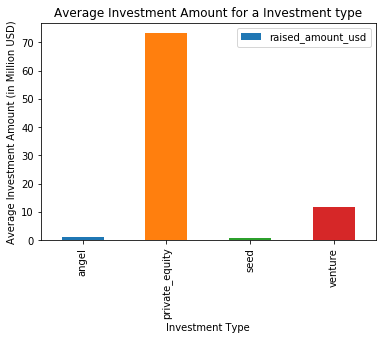

In [8]:
# Plotting for plot 1
plot1.plot(x='funding_round_type', y='raised_amount_usd', kind='bar')
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 8
figure_size[1] = 6
plt.rcParams["figure.figsize"] = figure_size
plt.ylabel('Average Investment Amount (in Million USD)')
plt.xlabel('Investment Type')
plt.title('Average Investment Amount for a Investment type')
plt.show()


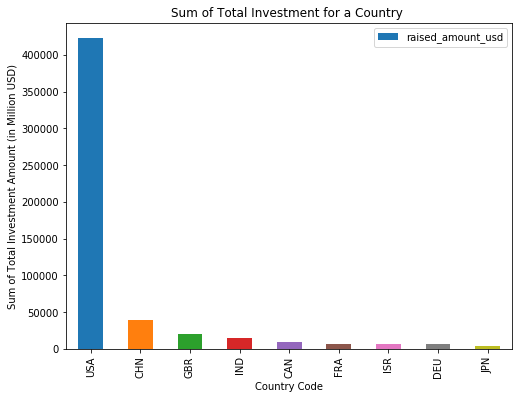

In [9]:
#Plotting for plot 2
top9['raised_amount_usd'] = top9['raised_amount_usd']/1000000 
top9.plot(x = 'country_code', y='raised_amount_usd', kind='bar' )
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 8
plt.rcParams["figure.figsize"] = figure_size
plt.xlabel('Country Code')
plt.ylabel('Sum of Total Investment Amount (in Million USD)')
plt.title('Sum of Total Investment for a Country ')
plt.show()

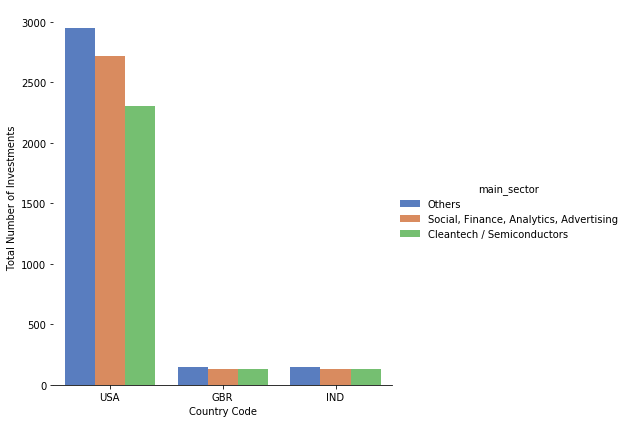

In [10]:
# Plot data for USA

plot3_Country1 = D1.groupby('main_sector').size().reset_index(name = 'no. of investments').sort_values(by= 'no. of investments', ascending=False).head(3)
plot3_Country1['country_code'] = 'USA'
plot3_Country1

# Plot data for GBR
plot3_Country2 = D2.groupby('main_sector').size().reset_index(name = 'no. of investments').sort_values(by= 'no. of investments', ascending=False).head(3)
plot3_Country2['country_code'] = 'GBR'
plot3_Country2

# Plot data for IND
plot3_Country3 = D2.groupby('main_sector').size().reset_index(name = 'no. of investments').sort_values(by= 'no. of investments', ascending=False).head(3)
plot3_Country3['country_code'] = 'IND'
plot3_Country3

# Plot data for after merging three data frames for group plot
Merged_plot = plot3_Country1.append(plot3_Country2).append(plot3_Country3)

# Plotting for plot 3
plot3 = sns.catplot(x="country_code", y="no. of investments", hue="main_sector", data=Merged_plot, height=6, kind="bar", palette="muted")
plot3.despine(left=True)
plot3.set_ylabels("Total Number of Investments")
plot3.set_xlabels("Country Code")